<a href="https://colab.research.google.com/github/9characters/Artificial-Intelligence/blob/master/federated_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/datafrick/tutorial

fatal: destination path 'tutorial' already exists and is not an empty directory.


In [6]:
cd tutorial

/content/tutorial


In [7]:
import numpy as np
import random
import cv2
import os

from imutils import paths
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

from fl_mnist_implementation_tutorial_utils import *

In [8]:
def load(img_path):
  ''' We expect that the data belonging to each class is kept in separate directory
      E.G. class 0 is kept in folder 0 '''
  
  data = []
  labels = []

  for i in range(10):

    # print(img_path)
    #Load the image and extract the label
    imgpath = f"{img_path}/{i}"

    #get the path list using the path object
    image_paths = list(paths.list_images(imgpath))
    for img in image_paths:
      im_gray = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
      image = np.array(im_gray).flatten()
      label = i
      print(label)

      #Scale the image in range [0,1] and add it to the list
      data.append(image/255)
      labels.append(label)

    #Show an update every verbose
    # if verbose > 0 and i > 0 and (i+1) % verbose == 0:
    #   print(f"[INFO] processed {i+1}/{len(paths)}")

    print(f"Done with {i + 1} data-shard!")
    # print(data)

  return data, labels

In [6]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d scolianni/mnistasjpg
!unzip mnistasjpg.zip

Streaming output truncated to the last 5000 lines.
  inflating: trainingSet/trainingSet/8/img_40004.jpg  
  inflating: trainingSet/trainingSet/8/img_4001.jpg  
  inflating: trainingSet/trainingSet/8/img_40019.jpg  
  inflating: trainingSet/trainingSet/8/img_40026.jpg  
  inflating: trainingSet/trainingSet/8/img_40029.jpg  
  inflating: trainingSet/trainingSet/8/img_40032.jpg  
  inflating: trainingSet/trainingSet/8/img_40055.jpg  
  inflating: trainingSet/trainingSet/8/img_40065.jpg  
  inflating: trainingSet/trainingSet/8/img_4007.jpg  
  inflating: trainingSet/trainingSet/8/img_40109.jpg  
  inflating: trainingSet/trainingSet/8/img_40120.jpg  
  inflating: trainingSet/trainingSet/8/img_40133.jpg  
  inflating: trainingSet/trainingSet/8/img_40136.jpg  
  inflating: trainingSet/trainingSet/8/img_40150.jpg  
  inflating: trainingSet/trainingSet/8/img_40157.jpg  
  inflating: trainingSet/trainingSet/8/img_40173.jpg  
  inflating: trainingSet/trainingSet/8/img_40180.jpg  
  inflating: tra

In [9]:
#declear path to your mnist data folder
img_path = 'trainingSet/trainingSet'

# #get the path list using the path object
# image_paths = list(paths.list_images(img_path))

#apply our function
image_list, label_list = load(img_path)

#binarize the labels
lb = LabelBinarizer()
label_list = lb.fit_transform(label_list)

#split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(image_list, 
                                                    label_list, 
                                                    test_size=0.1, 
                                                    random_state=42)

Streaming output truncated to the last 5000 lines.
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8

In [22]:
print(label_list[0])

[1 0 0 0 0 0 0 0 0 0]


In [16]:
print(label_list)

42000


In [10]:
def create_clients(image_list, label_list, num_clients=10, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of images and label lists.
        args: 
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(image_list, label_list))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [11]:
#create clients
clients = create_clients(X_train, y_train, num_clients=10, initial='client')

In [12]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object of it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [13]:
#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [27]:
print(clients_batched['client_1'])

<BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float64, tf.int32)>


In [14]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(200, input_shape=(shape,)))
        model.add(Activation("relu"))
        model.add(Dense(200))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

In [15]:
lr = 0.01 
comms_round = 100
loss='categorical_crossentropy'
metrics = ['accuracy']
optimizer = SGD(lr=lr, 
                decay=lr / comms_round, 
                momentum=0.9
               )            

In [16]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count

In [17]:
def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final

In [18]:
def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

In [19]:
def test_model(X_test, Y_test,  model, comm_round):
    cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    loss = cce(Y_test, logits)
    acc = accuracy_score(tf.argmax(logits, axis=1), tf.argmax(Y_test, axis=1))
    print('Epoch: {} | test_acc: {:.3%} | test_loss: {}'.format(comm_round, acc, loss))
    return acc, loss

In [51]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(784, 10)

global_acc_list = []
global_loss_list = []

#commence global training loop
for comm_round in range(comms_round):
    
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(784, 10)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        # print(len(clients_batched[client]))
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        global_acc_list.append(global_acc)
        global_loss_list.append(global_loss)

comm_round: 0 | global_acc: 60.024% | global_loss: 2.240872859954834
comm_round: 1 | global_acc: 75.429% | global_loss: 2.131709575653076
comm_round: 2 | global_acc: 79.690% | global_loss: 2.0068788528442383
comm_round: 3 | global_acc: 82.024% | global_loss: 1.910443902015686
comm_round: 4 | global_acc: 83.167% | global_loss: 1.8451517820358276
comm_round: 5 | global_acc: 84.048% | global_loss: 1.800243616104126
comm_round: 6 | global_acc: 84.881% | global_loss: 1.7686306238174438
comm_round: 7 | global_acc: 85.786% | global_loss: 1.7442233562469482
comm_round: 8 | global_acc: 86.452% | global_loss: 1.7259303331375122
comm_round: 9 | global_acc: 86.976% | global_loss: 1.71116042137146
comm_round: 10 | global_acc: 87.286% | global_loss: 1.6988441944122314
comm_round: 11 | global_acc: 87.500% | global_loss: 1.688843846321106
comm_round: 12 | global_acc: 87.905% | global_loss: 1.6798019409179688
comm_round: 13 | global_acc: 88.024% | global_loss: 1.672329068183899
comm_round: 14 | global_

In [64]:
global_acc= np.array(global_acc_list)
print(global_acc)

[0.6002381  0.75428571 0.79690476 0.8202381  0.83166667 0.84047619
 0.84880952 0.85785714 0.86452381 0.8697619  0.87285714 0.875
 0.87904762 0.8802381  0.88238095 0.88190476 0.88357143 0.8847619
 0.88809524 0.88809524 0.88952381 0.89119048 0.89428571 0.89333333
 0.89619048 0.89666667 0.89714286 0.89857143 0.89928571 0.90047619
 0.90142857 0.90261905 0.90333333 0.90285714 0.90452381 0.9047619
 0.90595238 0.9052381  0.90595238 0.90714286 0.90690476 0.90809524
 0.90857143 0.90809524 0.91047619 0.91071429 0.91119048 0.91142857
 0.91238095 0.91238095 0.91309524 0.91452381 0.9147619  0.9152381
 0.91595238 0.9152381  0.91714286 0.91761905 0.91738095 0.91809524
 0.91809524 0.9197619  0.92       0.92047619 0.92       0.92071429
 0.92166667 0.92119048 0.92214286 0.92190476 0.92357143 0.92333333
 0.92404762 0.92452381 0.9247619  0.9252381  0.92428571 0.9247619
 0.92547619 0.92571429 0.92571429 0.92619048 0.92738095 0.92666667
 0.92666667 0.92761905 0.92642857 0.92761905 0.92690476 0.92690476
 0.9

In [20]:
SGD_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(y_train)).batch(320)
smlp_SGD = SimpleMLP()
SGD_model = smlp_SGD.build(784, 10) 

SGD_acc_list = []

SGD_model.compile(loss=loss, 
              optimizer=optimizer, 
              metrics=metrics)

# fit the SGD training data to model
for i in range(100):

  SGD_model.fit(SGD_dataset, epochs=1, verbose=1)
  for(X_test, Y_test) in test_batched:
        SGD_acc, SGD_loss = test_model(X_test, Y_test, SGD_model, i+1)
        SGD_acc_list.append(SGD_acc)

#test the SGD global model and print out metrics
# for(X_test, Y_test) in test_batched:
#         SGD_acc, SGD_loss = test_model(X_test, Y_test, SGD_model, 1)

119/119 [==============================] - 1s 11ms/step - loss: 0.8900 - accuracy: 0.7617
Epoch: 1 | test_acc: 88.238% | test_loss: 1.6601132154464722
119/119 [==============================] - 2s 17ms/step - loss: 0.3309 - accuracy: 0.9043
Epoch: 2 | test_acc: 90.619% | test_loss: 1.6135520935058594
119/119 [==============================] - 2s 14ms/step - loss: 0.2772 - accuracy: 0.9203
Epoch: 3 | test_acc: 91.190% | test_loss: 1.5931826829910278
119/119 [==============================] - 2s 16ms/step - loss: 0.2446 - accuracy: 0.9297
Epoch: 4 | test_acc: 92.190% | test_loss: 1.5831897258758545
119/119 [==============================] - 1s 11ms/step - loss: 0.2197 - accuracy: 0.9363
Epoch: 5 | test_acc: 92.762% | test_loss: 1.5719022750854492
119/119 [==============================] - 1s 11ms/step - loss: 0.1990 - accuracy: 0.9425
Epoch: 6 | test_acc: 93.524% | test_loss: 1.5642961263656616
119/119 [==============================] - 1s 12ms/step - loss: 0.1814 - accuracy: 0.9469
Epoc

In [22]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


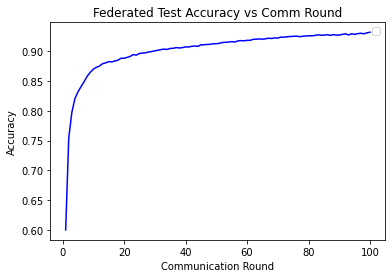

In [68]:
comm_round = np.arange(1,101)
gobal_acc = np.array(global_acc_list)
plt.plot(comm_round, global_acc, 'b')
plt.title('Federated Test Accuracy vs Comm Round')
plt.xlabel('Communication Round')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

No handles with labels found to put in legend.


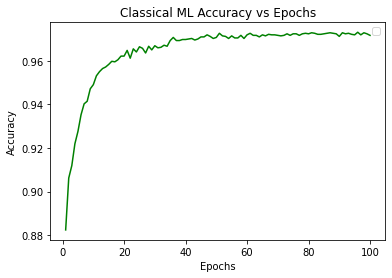

In [23]:
epochs = np.arange(1,101)
sgd_acc = np.array(SGD_acc_list)
plt.plot(epochs, sgd_acc, 'g')
plt.title('Classical ML Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()